# <p style="text-align: center;">How To</p>

## <p style="text-align: center;">Mesurer une r√©p√©tabilit√© de positionnement</p>
---

## I. Configuration logiciel et hardware
---

* Regler la valeur **Sampling cycle** √† 1ms

*note : envoyer les nouvelles donn√©es de configuration via le bouton "Send settings to controler"*

![CommonSettings](./img/common-set.png)

* Regler la valeur **Averaging Times** √† 1

*note : envoyer les nouvelles donn√©es de configuration via le bouton "Send settings to controler"*

![MovingAverage](./img/mov-ave.png)

## II. Outils statistiques pour l'interpr√©tation des donn√©es
---

>Le t√©l√©m√®tre laser permet l'acquisition d'une mesure √† chaque d√©clenchement du signal trigger. Chaque point est donc une mesure de position. L'√©chantillon minimum conseill√© est de 11 points afin d'√©valuer une r√©p√©tabilit√©. Toutefois il sera d'usage d'acqu√©rir au moins 100 points pour avoir un nombre d'√©chantillons suffisant pour utiliser les outils de statistiques descriptives avec un niveau de confiance satisfaisant.

Les outils graphique :

1. Le [**nuage de points**](https://fr.wikipedia.org/wiki/Nuage_de_points_(statistique)) permet d'illustrer les donn√©es mesur√©es
2. La [**boite √† moustache**](https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches) permet d'√©valuer visuellement les interquartiles ainsi que la m√©diane de la s√©rie de donn√©es
3. [**L'histogramme**](https://fr.wikipedia.org/wiki/Histogramme) permet d'observer la repartitions des classes de points de mesures
4. Le [**QQ-Plot**](https://fr.wikipedia.org/wiki/Diagramme_quantile-quantile) permet de v√©rifier que la s√©rie de donn√©es suit une loi normale

Les indicateurs statistiques permettant de confirmer ou non une r√©p√©tabilit√© sont :

1. la [**p-value**](https://fr.wikipedia.org/wiki/Valeur_p)
2. La [**capabilit√©**](https://fr.wikipedia.org/wiki/Capabilit%C3%A9_machine) not√© Cp

Ces diff√©rents outils statistiques permettent donc de v√©rifier une r√©p√©tabilit√© de positionnement √† l'aide des mesures acquises via le t√©l√©m√®tre laser Keyence.

Tous ces indicateurs sont g√©n√©r√©s automatiquement √† l'aide de la biblioth√®que `Keyence1D` pr√©sent√© dans la suite.

## III. Post traitement des mesures de r√©p√©tabilit√© issue du t√©l√©m√®tre laser Keyence
---

### 1. Pr√©requis

1. Installer le package Anaconda : https://www.anaconda.com/products/individual
2. Installer le package Keyence1D : **lien git √† ajouter**
3. Utiliser Jupyter Notebook ou tout autre IDE Python

### 2. Premier exemple : traitement d'un fichier de donn√©es brute et interpr√©tations 

Charger le package `repetabilityMeasure` √† partir de la biblioth√®que `Keyence1D` est une fonction permettant d'affichier les mesures issues du fichier csv g√©ner√© depuis le logiciel Keyence.

Pour importer la fonction (le fichier Keyence1D.py doit √™tre pr√©sent dans votre projet) :
```python
from keyence1D import repetabilityMeasure
```

Ex√©cuter la fonction avec comme param√®tre le nom du fichier brute :
```python
repetabilityMeasure("rawData.csv")
```

Enfin la fonction `repetabilityMeasure()` fournit 5 informations pour analyser les donn√©es mesurer :
* Nuages de points : permet l'observation des points de mesures
* Bo√Æte √† Tukey : permet l'observation de la m√©diane et des valeurs Max, Min et les interquartiles
* Histogramme des positions : permet l'observation de la distribution des points de mesures
* QQ-Plot ou Droite de Henry : permet de tester si la distribution suit une loi Normale
* p-value : test statistique permettant de **valider ou non si la distribution suit une loi Normale**

Ci-dessous un exemple :

./datas/Results_Position_Y_180326.csv as Statistics=0.989, p=0.00029


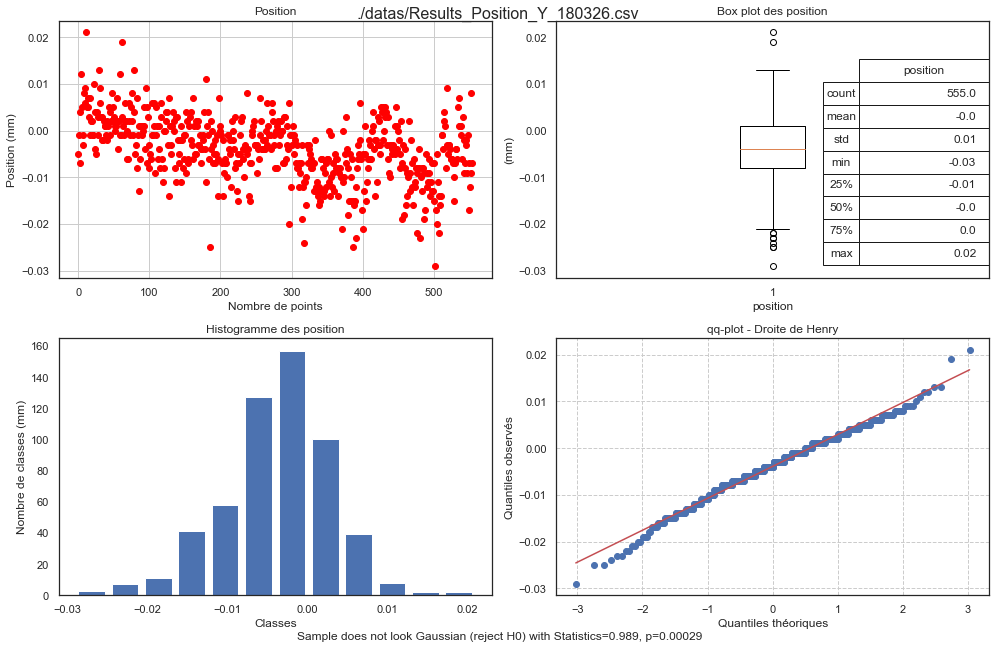

In [28]:
# Premier exemple si on souhaite faire une analyse de la r√©p√©tabilit√© sur un seul fichier

from keyence1D import repetabilityMeasure                              # Importer la fonction r√©p√©tabilit√©
import os                                                              # Importer la fonction os
os.chdir(r"C:\Users\Home\Documents\Git\KeyenceDataProcessing")         # D√©finir le repertoire des donn√©es brutes

repetabilityMeasure("./datas/Results_Position_Y_180326.csv")           # Executer la fonction avec le nom du fichier brute

**Commentaires** : *le nuage de points et la boite de tukey ainsi que l'histogramme semble indiquer des valeurs homog√®nes et suivant une loi Normale. Toutefois, le QQ-plot indique que pour les classe sup√©rieur √† 0.01 et inf√©rieur √† -0.02 il existe une discontinuit√©. Enfin la p-value est < √† 5% donc cette mesure n'est pas r√©p√©table.*

### 3. Deuxi√®me exemple : traitement de plusieurs fichiers de mesures brutes et intervalle de tol√©rance

>De mani√®re g√©n√©rale, on consid√®re que si le test statistique donne une p-value > 5%, alors la distribution suit une loi Normale. Dans le cas ou les mesures suivent une loi Normale **et uniquement dans ce cas**, alors il est beaucoup plus pratique d'utiliser l'indicateur de capabilit√© Cp : 

$$Cp = \frac {IT}{6\sigma}$$
avec :
* Cp = Capabilit√© --> **On consid√®re un processus capable si Cp > 1.33**
* IT = Intervalle de tol√©rance
* ùúé = √©cart type

La fonction `repetabilityMeasure()` prend aussi comme param√®tre l'IT √† tester, ainsi que l'option de sauvegarde des r√©sultats sous la forme d'un fichier image au format ".png". dans le cas ou la p-value > 5%, **et uniquement dans ce cas**, alors la Cp sera aussi calcul√©. Ci-dessous un exemple de param√®tres pour un IT = 1mm


```python
repetabilityMeasure('rawData.csv',   # Fichier de donn√©es brute
                    pngSave=True,    # Option de sauvegarde des r√©sultats au format .png (True ou False)
                    IT = 1)          # Intervalle de tol√©rance IT = 1mm pour le calcul de Cp
```


Il est donc tout √† fait possible de tester plusieurs fichiers brutes issus du logiciel Keyence, car dans certains cas plusieurs jeux de donn√©es sont a compar√©.

Ci-dessous un exemple :

Distrib_Norm.csv as Statistics=0.999, p=0.88814
Cp =0.167 
Distrib_Not_Norm.csv as Statistics=0.978, p=0.00000


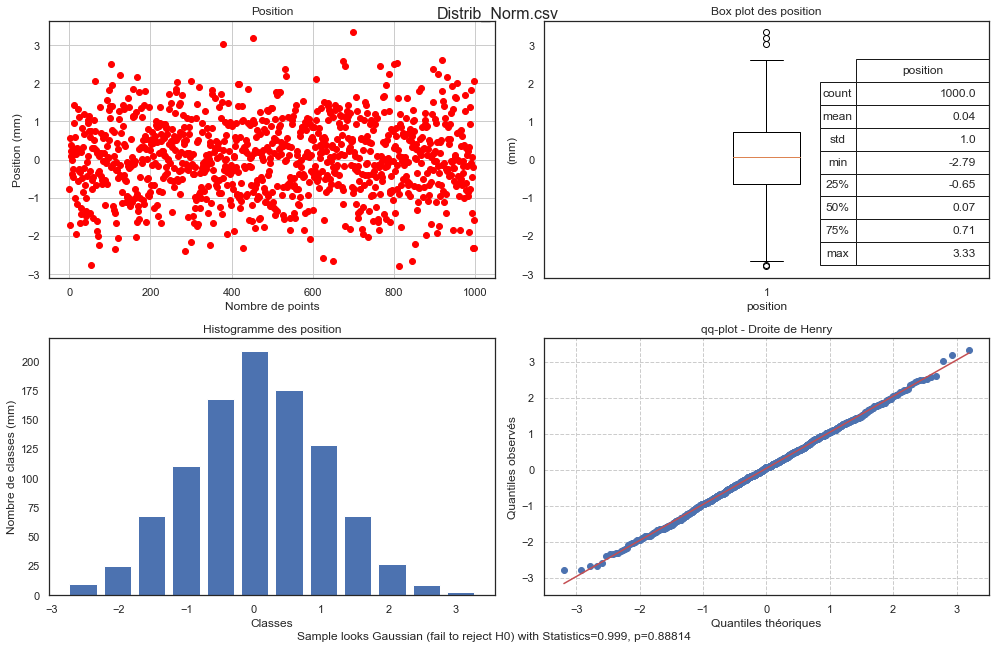

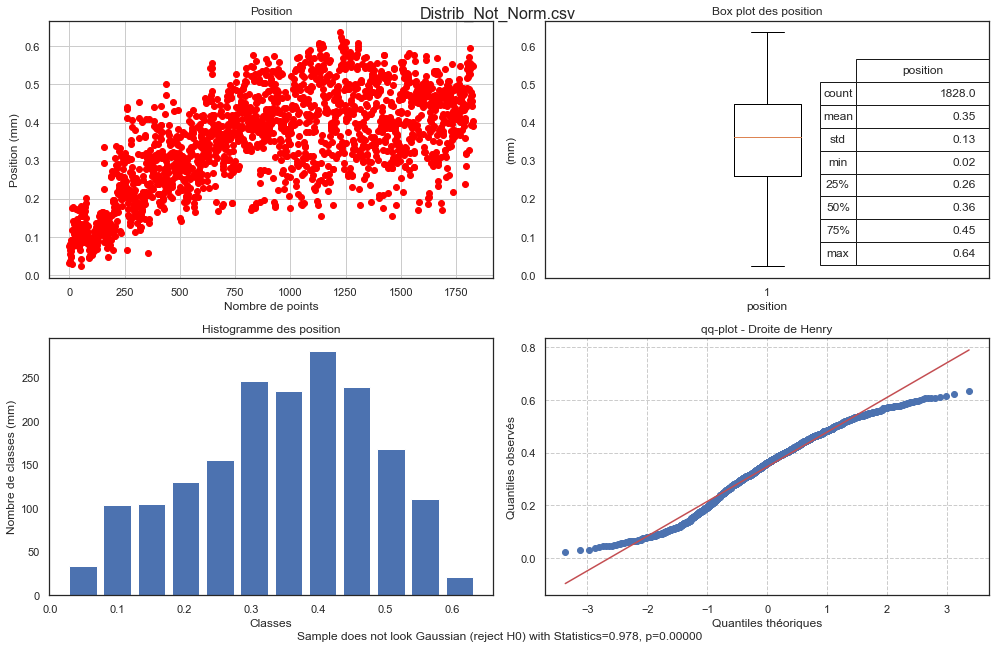

In [3]:
# Deuxieme exemple si on souhaite faire une analyse de la r√©p√©tabilit√© sur plusieurs fichiers

from keyence1D import repetabilityMeasure                              # Importer la fonction r√©p√©tabilit√©
import os                                                              # Importer la fonction os
import glob                                                            # Importer la fonction glob
os.chdir(r"C:\Users\Home\Documents\Git\KeyenceDataProcessing\datas")   # D√©finir le repertoire des donn√©es brutes

for file in glob.glob("*.csv"):                         # Parcourir le repertoire pour traiter les fichiers csv brutes
    repetabilityMeasure(file, pngSave=True, IT = 1)     # Execution de la fonction pour tous les fichiers et sauvegarde png

**Commentaires** : *uniquement le fichier 'Distrib_Norm.csv' pr√©sente une distribution normal mais √† une capabilit√© de 0.167, donc tr√©s inf√©rieur √† 1.33 pour un intervalle de tol√©rance de 1mm.*

# Conclusion

>Le t√©l√©m√®tre laser est capable d'acqu√©rir plusieurs points de mesure pour √©valuer une r√©p√©tabilit√©. La fonction de d√©clenchement (Trigger) est √† privil√©gier afin d'obtenir un jeu de donn√©es brutes exploitables en utilisant les outils de traitement de donn√©es du package `Keyence1D`.

>Les valeurs Min et Max ne sont pas des indicateurs suffisant pour s'assurer que le positionnement d'un axe est r√©p√©table. L'estimation de p-value et de Cp sont des estimateurs statistiques plus pertinents. Le but est de s'assurer que les positions successives prises par l'axe seront toujours contenues dans l'intervalle de tol√©rance souhait√©e. 